### Цель работы
Изучение алгоритмов и методов классификации на практике.
### Вариант: 2

### Задание:

**Порядок выполнения:**
1) Загрузить набор данных.
2) Провести предварительную обработку данных.
3) Выделить целевую переменную, которую необходимо предсказать. Не включать эту целевую переменную в модель. Построить матрицу диаграмм рассеяния, выделив значения целевой переменной разными цветами.
4) Разбить набор данных на тренировочной и тестовый датасеты с помощью ```train_test_split``` и выполнить стандартизацию числовых данных.
5) Для получения оценки 5 - разработать предсказательную модель качественного отклика методами:
    * метод k-ближайших соседей
    * дерево решений
    * логистическая регрессия
    * случайный лес
6) Оценить ошибку классификации для каждого метода. Подсчитать метрики ```"Accuracy"```, ```"Precision"```, ```"Recall"```, ```"Balanced accuracy"```, ```'F1 score'```.
7) Построить матрицу неточностей с помощью ```confusion_matrix``` для каждого метода.
8) Построить графики ROC-кривой для каждого метода на одном графике (4 линии на одном графике) для сравнения.
9) Сделать вывод о качестве построенного классификатора по подсчитанным выше метрикам.

### Описание набора данных ```employee_attrition```:
Содержит информацию о сотрудниках:
- ```age``` — возраст сотрудника (лет), числовой.
- ```gender``` — пол: ```M / F```, категориальный.
- ```department``` — департамент: ```Sales / Engineering / HR / Finance / Support```, категориальный.
- ```job_level``` — грейд должности (```1–5```), целочисленный.
- ```marital_status``` — семейное положение: ```Single / Married / Divorced```, категориальный.
- ```monthly_income``` — месячный доход, ```USD/мес, числовой```.
- ```years_at_company``` — годы в компании, целочисленный.
- ```overtime``` — переработки: ```Yes / No```, категориальный.
- ```performance_rating``` — оценка эффективности (```1–4```), целочисленный порядковый.
- ```distance_from_home_km``` — расстояние от дома до офиса, км, числовой.
- ```training_hours_last_year``` — часы обучения за прошлый год, целочисленный.
- ```Attrition``` — целевой класс: ```1``` — уволился, ```0``` — остался.

### 1. Загрузка набора данных и импорт библиотек

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, balanced_accuracy_score, confusion_matrix, 
                             roc_curve, roc_auc_score)

sns.set_theme(style="darkgrid")

df = pd.read_csv('employee_attrition.csv')

print("Размер датасета:", df.shape)
display(df.head())
print("Информация о типах данных:")
display(df.info())

Размер датасета: (3048, 12)


,age,gender,department,job_level,marital_status,monthly_income,years_at_company,overtime,performance_rating,distance_from_home_km,training_hours_last_year,Attrition
0,31,F,Engineering,1,Single,5163.0,14,No,3,24.1,141.0,0
1,29,M,Sales,2,Divorced,13878.0,1,No,3,4.6,141.0,0
2,26,F,Support,1,Married,4712.0,6,No,3,8.4,148.0,0
3,61,F,Engineering,2,Single,12196.0,12,Yes,4,2.2,98.0,0
4,59,F,Sales,5,Single,15823.0,18,No,4,7.2,10.0,0


Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3048 non-null   int64  
 1   gender                    3048 non-null   object 
 2   department                3048 non-null   object 
 3   job_level                 3048 non-null   int64  
 4   marital_status            3048 non-null   object 
 5   monthly_income            3048 non-null   float64
 6   years_at_company          3048 non-null   int64  
 7   overtime                  3048 non-null   object 
 8   performance_rating        3048 non-null   int64  
 9   distance_from_home_km     3048 non-null   float64
 10  training_hours_last_year  3048 non-null   float64
 11  Attrition                 3048 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 285.9+ KB


None

**Вывод:**

1) Датасетъ содержит информацию о 3048 сотрудниках компании и включает 12 признаков.
2) Целевая переменная - столбец ```Attrition```, бинарный признак (0 - сотрудник остался в компании, 1 - уволился)
3) Числовые признаки (8): ```age, job_level, monthly_income, years_at_company, performance_rating, distance_from_home_km, training_hours_last_year, Attrition```.
4) Категориальные признаки (4): ```gender, department, marital_status, overtime```.
5) Все столбцы заполнены полностью - пропущенных значений нет, что упрощает предварительную обработку данных


### 2. Предварительная обработка данных

In [65]:
# описательная статистика для числовых признаков
display(df.describe())

# распределение категориальных признаков
display(df['gender'].value_counts())
display(df['department'].value_counts())
display(df['marital_status'].value_counts())
display(df['overtime'].value_counts())

,age,job_level,monthly_income,years_at_company,performance_rating,distance_from_home_km,training_hours_last_year,Attrition
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000
mean,41.308071,2.188976,7727.857283,20.102362,2.838583,10.236490,104.930118,0.091207
std,13.431709,1.165800,4058.833918,11.826501,0.733775,9.208483,76.474385,0.287951
min,18.000000,1.000000,1488.000000,0.000000,1.000000,-1.900000,0.000000,0.000000
25%,30.000000,1.000000,4901.750000,10.000000,2.000000,4.100000,50.000000,0.000000
50%,42.000000,2.000000,6733.000000,20.000000,3.000000,8.200000,102.000000,0.000000
75%,53.000000,3.000000,9529.500000,30.000000,3.000000,14.100000,151.000000,0.000000
max,64.000000,5.000000,35395.000000,40.000000,4.000000,99.840000,735.000000,1.000000


gender
M    1539
F    1509
Name: count, dtype: int64

department
Engineering    1051
Sales           788
Support         526
Finance         443
HR              240
Name: count, dtype: int64

marital_status
Married     1470
Single      1220
Divorced     358
Name: count, dtype: int64

overtime
No     2201
Yes     847
Name: count, dtype: int64

**Вывод:**

Для числовых признаков:
1) Средний возраст сотрудников - 41.3 года (минимум - 18, максимум - 64).
2) Средний месячный доход - 7728 USD, с высоким стандартным отклонением (4059), что указывает на значительное разнообразие уровней дохода (от 1488 до 35395 USD).
3) Средний стаж работы в компании - 20.1 года, что говорит о преобладании опытных сотрудников.
4) Среднее расстояние от дома до офиса - 10.2 км, однако наблюдаются аномальные значения (минимум - -1.9 км).
5) Часы обучения за прошлый год варьируются от 0 до 735, со средним значением 105 часов.
6) Оценка эффективности сосредоточена в диапазоне от 1 до 4, со средним значением 2.84, что указывает на преобладание среднего и хорошего уровня выполнения задач.
7) 9.1% сотрудников уволились за рассматриваемый период (Attrition = 1), что свидетельствует о том, что основное внимание модели должно быть направлено на корректное выявление ушедших сотрудников.

Для категориальных признаков:
1) Пол распределён почти поровну: 1539 мужчин и 1509 женщин.
2) Большинство сотрудников работают в отделах Engineering (1051) и Sales (788).
3) По семейному положению преобладают женатые/замужние (1470), затем холостые/незамужние (1220) и разведённые (358).
4) 72.2% сотрудников (2201) не работают сверхурочно, тогда как 27.8% (847) - работают.
5) Неявные дубликаты отстутствуют.

Далее будет реализовано удаление отрицательных расстояний, так как это технические ошибки (расстояние не может быть отрицательным), такие значения искажают анализ и работу моделей машинного обучения, аномальные значения составляют небольшой процент от общего объема данных (менее 10%).

In [66]:
# удаление аномальных (отрицательных) значений расстояния от дома до офиса
print(f"Исходное количество строк: 3048")
df = df[df['distance_from_home_km'] >= 0]
print(f"Количество строк после удаления аномалий: {len(df)}")

Исходное количество строк: 3048
Количество строк после удаления аномалий: 2935


### №3 Выделение целевой переменной. Матрица диаграмм рассеяния.

Была выделена целевая переменная, которую необходимо предсказать. Целевая переменная не включена в модель. Реализована матрица диаграмм рассеяния, выделив значения целевой переменной разными цветами.

Числовые признаки: ['age', 'job_level', 'monthly_income', 'years_at_company', 'performance_rating', 'distance_from_home_km', 'training_hours_last_year']
Категориальные признаки: ['gender', 'department', 'marital_status', 'overtime']


<Figure size 1000x1000 with 0 Axes>

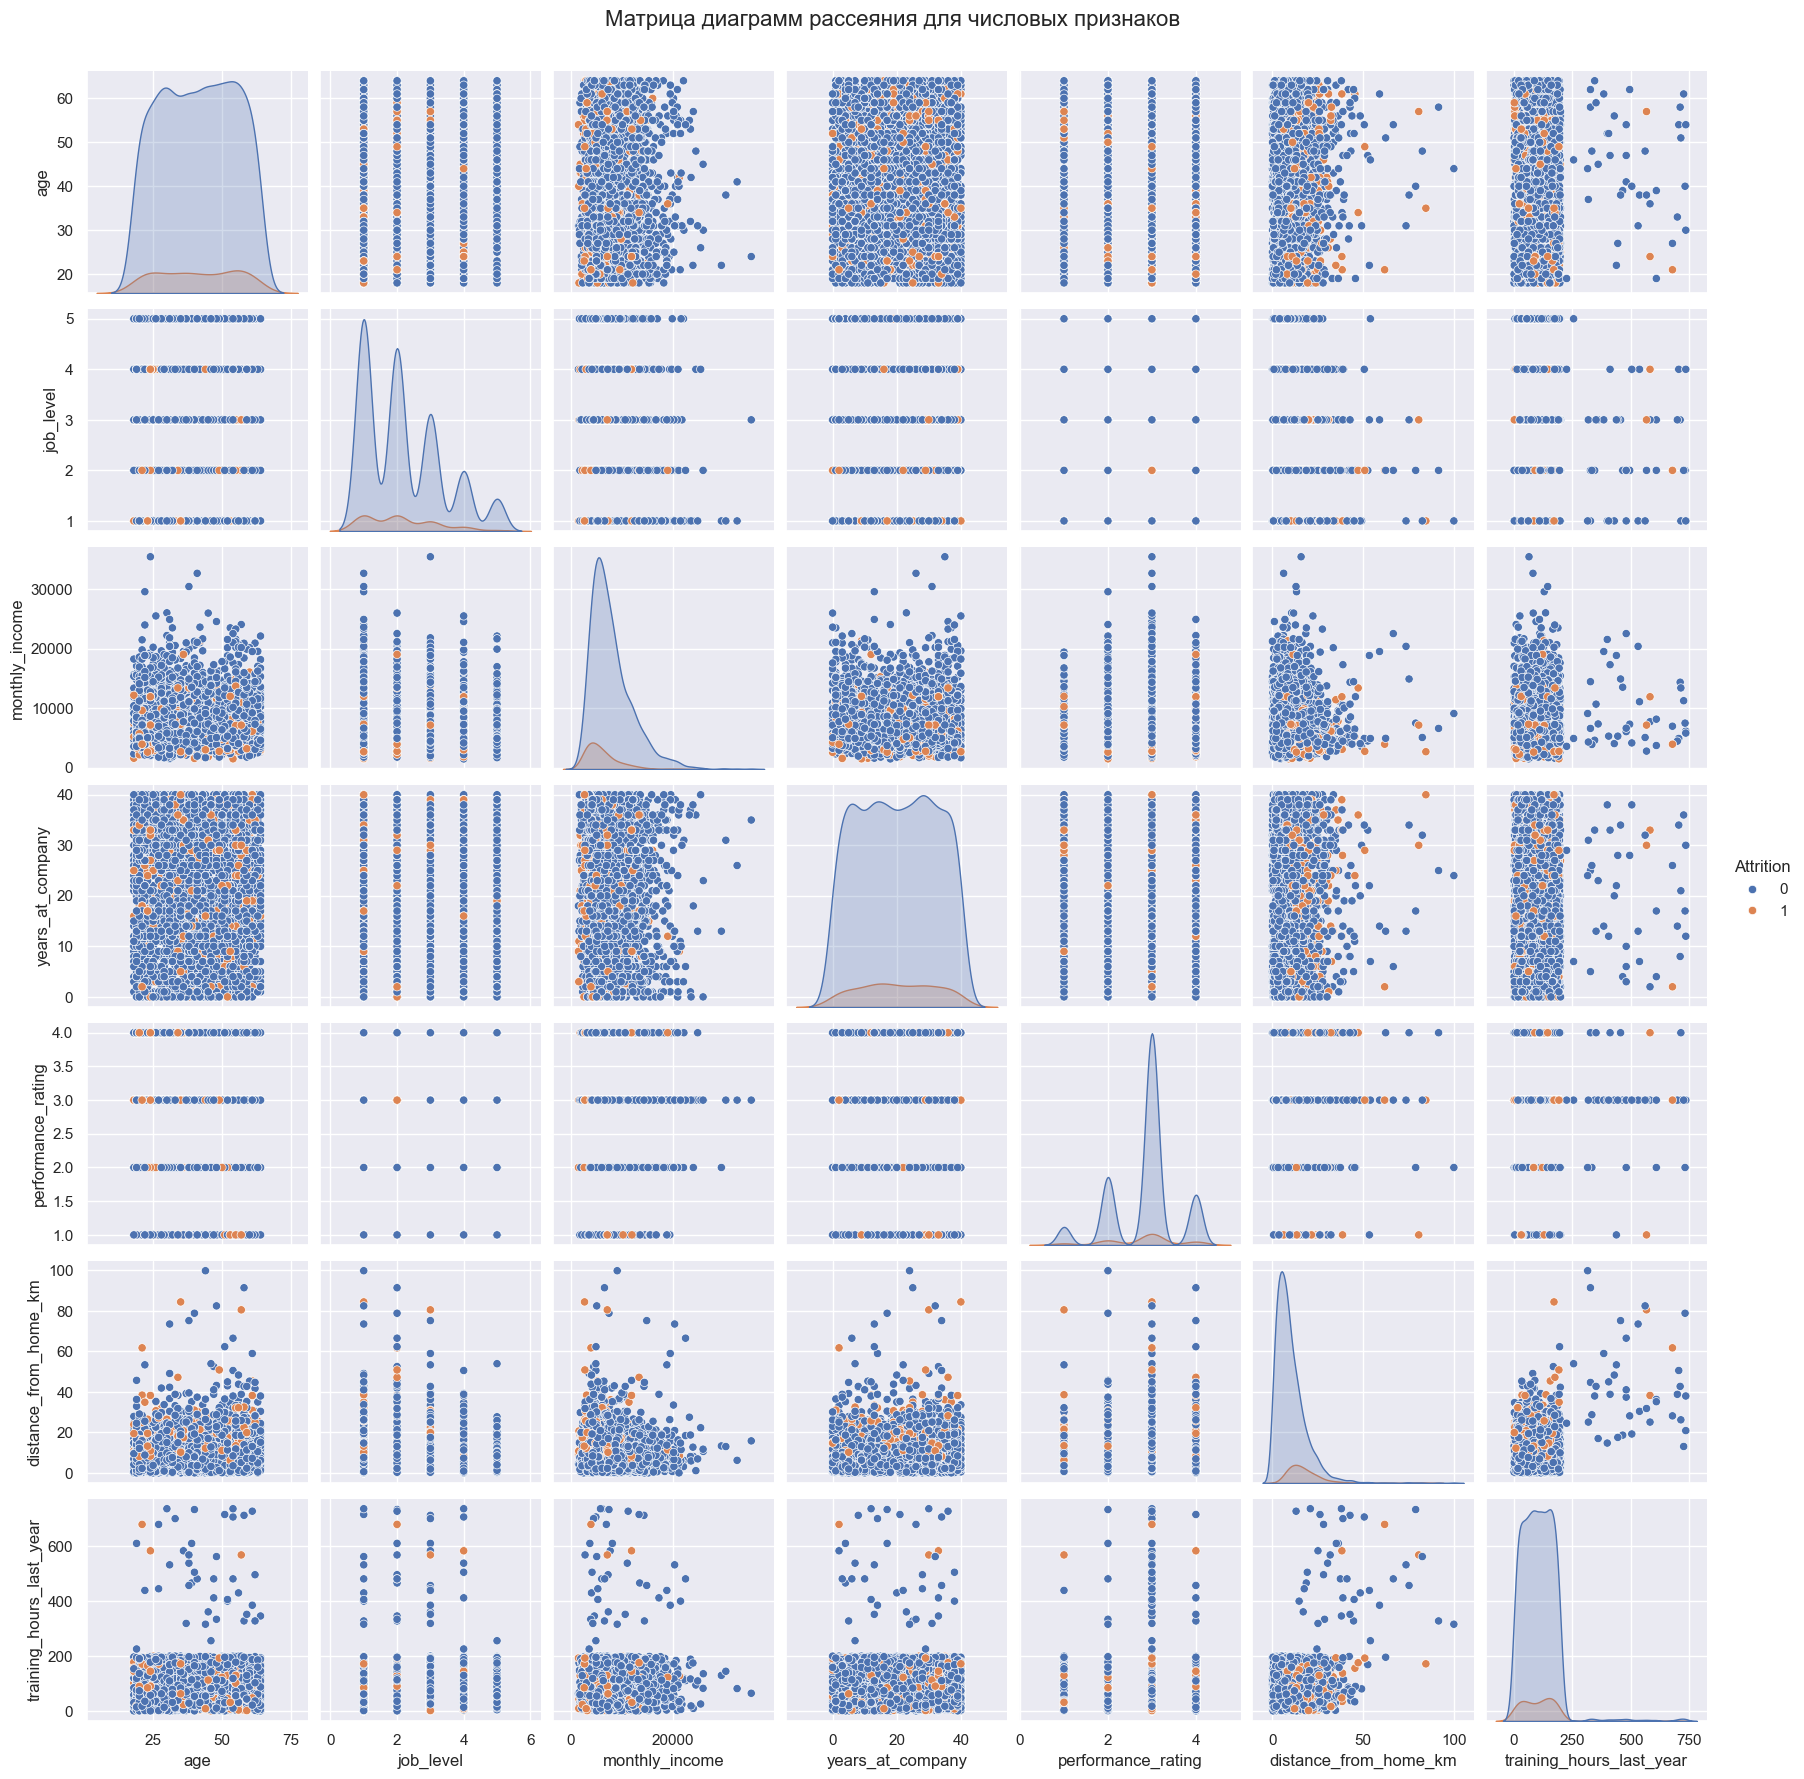

In [67]:
# исключение целевой переменной из признаков
target_col = "Attrition"
y = df[target_col].copy()
X = df.drop(columns=[target_col]).copy()

# выделение числовых признаков
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

print(f"Числовые признаки: {num_cols}")
print(f"Категориальные признаки: {cat_cols}")

# матрица диаграмм рассеяния для числовых признаков, Attrition выделен цветом
plt.figure(figsize=(10, 10))
sns.pairplot(df, vars=num_cols, hue='Attrition')
plt.suptitle('Матрица диаграмм рассеяния для числовых признаков', y=1.02, fontsize=16)
plt.show()

**Вывод:**

1) Возраст и увольнения: сотрудники младше 25 лет имеют более высокую вероятность увольнения (оранжевые точки преобладают в этой возрастной группе).
2) Доход и стаж: наблюдается положительная корреляция между месячным доходом и стажем работы в компании. Сотрудники с низким доходом и коротким стажем (менее 5 лет) чаще увольняются, что указывает на важность конкурентоспособной зарплаты для удержания новых сотрудников.
3) Уровень должности и увольнения: сотрудники с низким уровнем (1) демонстрируют более высокую склонность к увольнению по сравнению с сотрудниками на более высоких уровнях. Это может быть связано с ограниченными возможностями карьерного роста.
4) Расстояние до работы: сотрудники, живущие дальше от офиса (более 20 км), чаще увольняются. Это подчеркивает важность учета географического фактора при анализе оттока персонала.
5) Обучение и увольнения: сотрудники с низким количеством часов обучения в прошлом году чаще увольняются, что указывает на важность программ профессионального развития для удержания персонала.
6) Оценка эффективности: сотрудники с более высокими оценками эффективности (3-4) реже увольняются, что подтверждает связь между признанием достижений и лояльностью сотрудников.

### №4 Деление набора данных на тренировочной и тестовый датасеты с помощью  ```train_test_split``` и выполнение стандартизации числовых данных.

В ходе предварительной обработки данных категориальные признаки были преобразованы методом One-Hot кодирования, после чего был обновлён список доступных числовых признаков. Затем датасет был разделён на обучающую и тестовую выборки в пропорции 70/30 с сохранением пропорций классов целевой переменной. Для обеспечения корректной работы моделей машинного обучения числовые признаки были стандартизированы: на обучающей выборке были вычислены параметры масштабирования, которые затем применены и к тестовой выборке. В завершение выполнена проверка размеров сформированных выборок. KNN и логистическая регрессия требуют масштабирования, деревья и случайный лес - нет, поэтому:\
X_train_scaled, X_test_scaled - для KNN и LogReg\
X_train, X_test - для DecisionTree и RandomForest

In [68]:
# one-Hot кодирование категориальных признаков
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Обновление списка признаков после кодирования
num_cols_encoded = [col for col in num_cols if col in X_encoded.columns]  

# разделение на train/test выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y 
)

# стандартизация числовых признаков
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols_encoded] = scaler.fit_transform(X_train[num_cols_encoded])
X_test_scaled[num_cols_encoded] = scaler.transform(X_test[num_cols_encoded])

print("Размеры выборок:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")


Размеры выборок:
Train: (2054, 15), Test: (881, 15)


### №5. Разработка предсказательной модели качественного отклика методами: метод k-ближайших соседей, дерево решений, логистическая регрессия, случайный лес с помощью соответсвующих функций: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, RandomForestClassifier.

In [69]:
# обучение и предсказание методом KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# обучение и предсказание методом дерева решений
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# обучение и предсказание методом логистической регрессии
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# обучение и предсказание методом случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### №6 Оценка ошибки классификации для каждого метода. Подсчет метрик ```"Accuracy"```, ```"Precision"```, ```"Recall"```, ```"Balanced accuracy"```, ```"F1 score"```.

In [70]:
# Метрики методом KNN
print("KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-score:", f1_score(y_test, y_pred_knn))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_knn))

KNN
Accuracy: 0.9035187287173666
Precision: 0.4166666666666667
Recall: 0.060240963855421686
F1-score: 0.10526315789473684
Balanced Accuracy: 0.5257345170154302


In [71]:
# Метрики методом дерева решений
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.8785471055618616
Precision: 0.2692307692307692
Recall: 0.1686746987951807
F1-score: 0.2074074074074074
Balanced Accuracy: 0.5605278255880666


In [72]:
# Метрики методом логистической регресии
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.9023836549375709
Precision: 0.3333333333333333
Recall: 0.03614457831325301
F1-score: 0.06521739130434782
Balanced Accuracy: 0.5143128906603859


In [73]:
# Метрики методом случайного леса
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))

Random Forest
Accuracy: 0.905788876276958
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Balanced Accuracy: 0.5


C:\Users\Anastasia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Общая картина: несбалансированные классы
Во всех моделях наблюдается высокая Accuracy (от 87.8% до 90.6%), что может выглядеть как хороший результат. Однако ключевая метрика для редкого класса - Recall - крайне низкая: от 0% до 16.8%. Это означает, что модели почти не обнаруживают сотрудников, которые действительно увольняются (класс 1).
Ситуация объяснима: доля уволившихся мала, и модели по умолчанию склонны предсказывать «0 - остался», что искусственно повышает Accuracy, но ухудшает качество именно для целевого класса.

#### Сравнение моделей

##### Логистическая регрессия - высокий Accuracy, но почти нулевой Recall
- Accuracy: 90.24%
- Precision: 0.33
- Recall: 0.036
- F1-score: 0.065
- Balanced Accuracy: 0.514
Вывод: логистическая регрессия здесь неэффективна. Она очень плохо различает класс увольнений - почти всегда предсказывает «0». Несмотря на высокую общую Accuracy, практической ценности при таком Recall мало.
##### Дерево решений - лучше всех по Recall
- Recall: 16.9% - лучший среди всех моделей
- F1: 0.207 - самый высокий
- Accuracy: 87.85%
Вывод: дерево решений - единственная модель, которая хотя бы частично находит сотрудников, склонных к увольнению. Несмотря на более низкую Accuracy, оно лучше всех работает с несбалансированными данными.
##### Random Forest - полностью проигрывает задачу
- Accuracy: 90.58%
- Precision: 0.0
- Recall: 0.0
- F1-score: 0.0
- Balanced Accuracy: 0.5
Вывод: случайный лес не выделяет ни одного сотрудника, который уволился. Это следствие сильного перекоса классов и слишком консервативного поведения модели. В текущем виде RF непригоден для задачи прогнозирования увольнений.
##### KNN - высокий Accuracy, но почти не находит уволившихся
- Accuracy: 90.35%
- Precision: 0.42
- Recall: 0.06 (очень низкий)
- F1-score: 0.105
- Balanced Accuracy: 0.526
Вывод: модель почти всегда предсказывает, что сотрудник не уволится. Качество по целевому классу низкое. Работает плохо из-за высокой размерности и сложной структуры признаков, даже несмотря на масштабирование.
#### Итоговый вывод
Для задачи прогнозирования увольнения сотрудников:
Дерево решений - единственная модель, которая хоть как-то выявляет класс Attrition=1. Обладает лучшим Recall и наивысшим F1-score.

KNN и логистическая регрессия показывают высокую Accuracy, но практически не находят уволившихся сотрудников, что делает их непригодными для использования.

Random Forest полностью игнорирует положительный класс, что свидетельствует о необходимости настройки (увеличение веса класса 1, подбор порога, изменение max_depth).

В целом результаты подтверждают, что задача крайне чувствительна к дисбалансу классов.

### №7. Построение матрицы неточностей с помощью `confusion_matrix` для каждого метода.

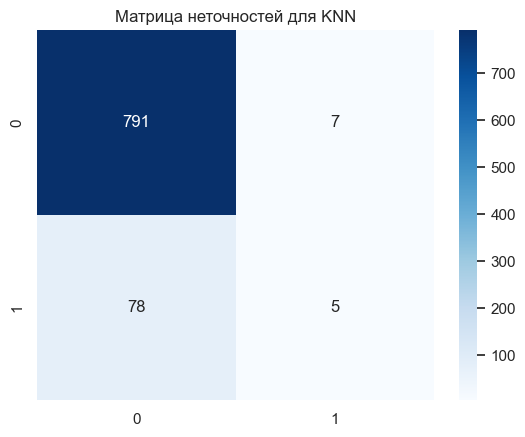

In [74]:
# Матрица неточностей KNN
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей для KNN")
plt.show()

**Выводы по матрице неточностей KNN:**
1) True Negative (TN): 791 - модель правильно определила 791 сотрудника, которые остались в компании
2) False Positive (FP): 7 - модель ошибочно предсказала увольнение для 7 сотрудников, которые остались
3) False Negative (FN): 78 - модель ошибочно предсказала, что 78 сотрудников останутся, но они уволились
4) True Positive (TP): 5 - модель правильно определила всего 5 уволившихся сотрудников
5) Высокая общая точность (Accuracy = 90.35%) - модель правильно классифицирует 796 из 881 объектов, но этот показатель обманчив из-за несбалансированности данных
6) Крайне низкая полнота (Recall = 6.02%) - модель выявляет только 5 из 83 уволившихся сотрудников (5 TP из 83 реальных увольнений). Это критически важный недостаток, так как основная цель анализа оттока - своевременное выявление сотрудников, которые уйдут
7) Низкая точность (Precision = 41.67%) - когда модель предсказывает увольнение, она ошибается в 58% случаев, что снижает доверие к таким предсказаниям
8) Высокая специфичность (99.12%) - модель почти идеально определяет сотрудников, которые останутся в компании, но это не решает основную задачу
9) Модель KNN в текущей конфигурации неэффективна для задачи прогнозирования увольнений, так как практически игнорирует положительный класс (Attrition=1)

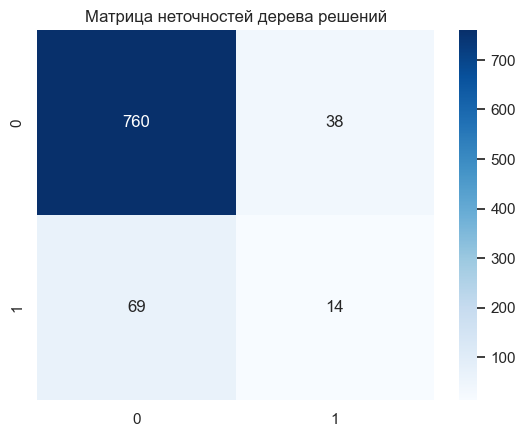

In [75]:
# Матрица неточностей дерева решений
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей дерева решений")
plt.show()

**Выводы по матрице неточностей дерева решений:**
1) True Negative (TN): 760 - модель корректно определила 760 сотрудников, которые остались в компании
2) False Positive (FP): 38 - 38 сотрудников ошибочно предсказаны как уволившиеся
3) False Negative (FN): 69 - 69 сотрудников, которые на самом деле уволились, но модель предсказала, что они останутся
4) True Positive (TP): 14 - всего 14 случаев увольнения были правильно предсказаны
5) Высокая общая точность (около 88%): модель в целом показывает хорошую способность классифицировать большинство случаев, но это обманчиво из-за несбалансированности данных
6) Критически низкий recall (около 17%): модель обнаруживает только 14 из 83 реальных случаев увольнения. Это означает, что 83% реальных увольнений остается незамеченными моделью
7) Высокая специфичность (95.2%): модель хорошо определяет сотрудников, которые останутся (760 из 798), что объясняет высокую общую точность
8) Низкий precision (26.9%): Из всех случаев, где модель предсказала увольнение, только 14 из 52 были верными. Это означает, что когда модель говорит "уволится", она ошибается в 73% случаев
9) Модель очень консервативна в предсказании увольнений, предпочитая минимизировать ложные срабатывания (FP), но в ущерб обнаружению реальных случаев (FN). Для HR-отдела эта модель малополезна, так как пропускает 83% реальных увольнений, что не позволяет своевременно принимать меры по удержанию персонала. Высокий показатель TN указывает, что модель хорошо работает с основным классом (сотрудники, остающиеся в компании), но крайне неэффективна для целевого класса (Attrition=1)

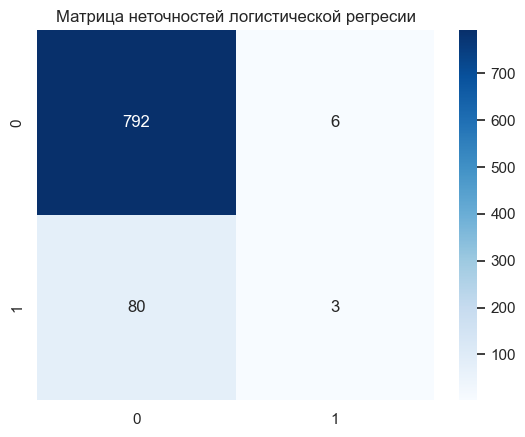

In [76]:
# Матрица неточностей логистической регресии
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей логистической регресии")
plt.show()

**Выводы по матрице неточностей логистической регрессии:**
1) Высокая точность предсказания для класса 0 (оставшихся сотрудников): модель правильно идентифицировала 792 из 798 случаев, где истинное значение было 0. Это указывает на то, что модель эффективно определяет сотрудников, которые останутся в компании
2) Критически низкая эффективность в обнаружении увольняющихся сотрудников (класс 1): из 83 истинных случаев увольнения (80+3) модель верно предсказала только 3 случая (3.6% recall). Это означает, что модель пропускает 96.4% сотрудников, которые впоследствии уволятся
3) Сильный дисбаланс в предсказаниях: модель имеет 80 ложноотрицательных ошибок (FN), что значительно превышает 6 ложноположительных ошибок (FP). Это свидетельствует о сильном смещении модели в сторону предсказания класса 0 (оставшихся сотрудников)
4) Проблема несбалансированности данных: такой результат типичен для ситуаций, когда классы в данных сильно несбалансированы (в данном случае вероятно, большинство сотрудников оставались в компании). Модель "выучила" этот дисбаланс и предпочитает предсказывать доминирующий класс для максимизации общей точности
5) Модель практически бесполезна для основной бизнес-задачи - предсказания увольнения сотрудников, так как она не может эффективно обнаруживать уходящих работников

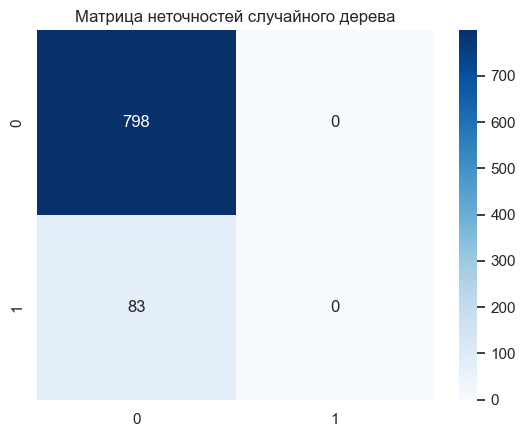

In [77]:
# Матрица неточностей случайного дерева
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей случайного дерева")
plt.show()

**Выводы по матрице неточностей случайного дерева:**
1) Полная неспособность модели предсказывать класс 1 (Attrition = 1): модель не смогла корректно идентифицировать ни одного случая увольнения (TP = 0). Это критически важный недостаток, так как основная цель задачи - прогнозирование увольнений
2) Систематическая ошибка в сторону класса 0: модель всегда предсказывает класс 0 (сотрудник остался), что приводит к: 832 верно предсказанным случаям (TN); 83 ложно отрицательным случаям (FN), когда сотрудник уволился, но модель предсказала, что он останется
3) Обманчиво высокая точность: общая точность (Accuracy) составляет примерно 91% (832/915), но это значение не отражает реальную полезность модели из-за дисбаланса классов. В данном случае модель просто "угадывает" более частый класс, что не решает поставленную бизнес-задачу
4) Нулевые метрики для класса 1: Precision = 0 (модель не выявила ни одного истинно положительного случая); Recall = 0 (модель не смогла обнаружить ни одного фактического увольнения); F1-score = 0
5) Практическая бесполезность: для HR-отдела такая модель не имеет ценности, так как не позволяет выявлять сотрудников, находящихся в зоне риска увольнения, и соответственно, не может использоваться для проактивных мер по удержанию персонала

**Следующие выводы по полученным матрицам:**

Существует системная проблема во всех алгоритмах классификации при прогнозировании увольнений сотрудников:
1) Проблема несбалансированных классов:
   - все модели демонстрируют сильное смещение в сторону класса 0 (сотрудники, остающиеся в компании);
   - модели оптимизируются под максимизацию общей точности за счет игнорирования редкого класса.
2) Критически низкая способность обнаружения увольнений:
   - KNN: обнаруживает лишь 6.02% увольнений (TP = 5 из 83);
   - Дерево решений: обнаруживает только 17% увольнений (TP = 14 из 83);
   - Логистическая регрессия: обнаруживает всего 3.6% увольнений (TP = 3 из 83);
   - Случайный лес: полностью неспособен обнаружить ни одного случая увольнения (TP = 0).
3) Все модели практически бесполезны для HR-отдела в текущей конфигурации:
   - невозможность своевременно выявлять сотрудников, находящихся в зоне риска;
   - отсутствие возможности принимать превентивные меры для удержания ценных сотрудников;
   - финансовые потери компании из-за неожиданных увольнений ключевых специалистов;
   - случайный лес, несмотря на популярность алгоритма, показал худший результат, полностью игнорируя класс увольнений

### №8. Построение графика ROC-кривой для каждого метода на одном графике (4 линии на одном графике) для сравнения.

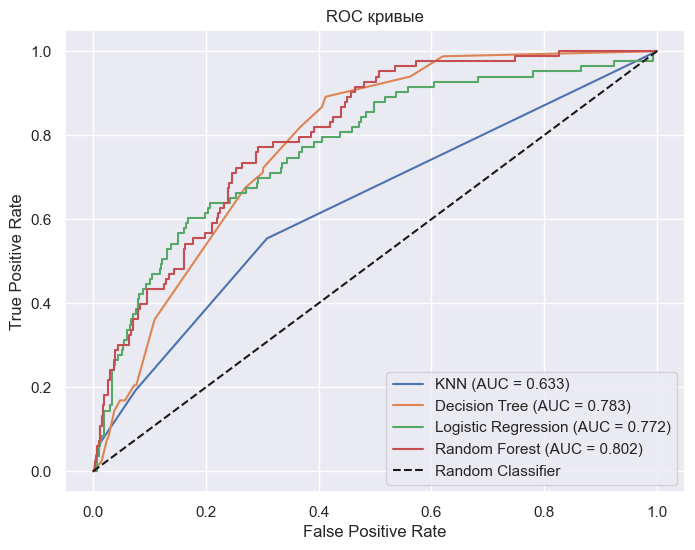

In [78]:
plt.figure(figsize=(8, 6))

# KNN
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1]):.3f})')

# Decision Tree
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]):.3f})')

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]):.3f})')

# Random Forest
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.3f})')

# Диагональ (случайный классификатор)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривые')
plt.legend()
plt.grid(True)
plt.show()

**Выводы:**
1.  Общая эффективность моделей: все четыре модели (KNN, Decision Tree, Logistic Regression, Random Forest) демонстрируют результаты, превышающие случайное предсказание (пунктирная линия с AUC=0.5). Это означает, что все они способны различать классы "уволился" и "остался" лучше, чем случайный угадыватель.

2. Сравнение моделей по AUC:
    - Лучшая модель: Случайный лес (красная линия) показывает наилучший результат с площадью под кривой (AUC) 0.802. Ее кривая наиболее близка к идеальному верхнему левому углу (TPR=1, FPR=0), что говорит о высокой способности правильно классифицировать положительные случаи (уволившихся сотрудников) при минимальном количестве ложных срабатываний.
    - Второе место: Дерево решений (оранжевая линия) следует сразу за ней с AUC 0.783. Разница в AUC между случайным лесом и деревом решений составляет 0.019, что указывает на их относительно сопоставимую эффективность в данной задаче.
    - Третье место: Логистическая регрессия (зеленая линия) имеет AUC 0.772. Хотя это хороший результат, он немного ниже, чем у двух лидеров, что может быть связано с линейной природой модели, которая не всегда эффективно улавливает сложные нелинейные зависимости в данных.
    - Четвертое место: Метод k-ближайших соседей (синяя линия) показывает наименьшую эффективность среди рассмотренных моделей с AUC 0.633. Это значение близко к порогу случайного предсказания, что указывает на слабую способность модели различать классы.

3.  Интерпретация кривых:
    - Кривая случайного леса проходит выше остальных во всем диапазоне значений FPR, что подтверждает его превосходство в балансе между истинно-положительными и ложно-положительными результатами.
    - Кривая KNN начинается с относительно высокого значения TPR при очень малых FPR, но затем быстро отстает, что может указывать на то, что она хорошо работает при строгих порогах, но хуже обобщает при их ослаблении.
    - Кривая дерева решений имеет более "ступенчатый" вид, что характерно для этого алгоритма, и ее качество находится между логистической регрессией и случайным лесом.
    - Кривая логистической регрессии, несмотря на несколько более низкую AUC, показывает относительно гладкое поведение и стабильную эффективность на всем диапазоне порогов.

### Выводы по лабораторной работе:

В ходе выполнения лабораторной работы была решена задача бинарной классификации - прогнозирование оттока сотрудников на основе датасета employee_attrition.csv. Была проведена предварительная обработка: выполнено One-Hot-кодирование категориальных переменных и стандартизация числовых признаков с использованием StandardScaler. Набор данных был разделен на обучающую и тестовую выборки в соотношении 70/30.

Для решения задачи были реализованы и сравнены четыре метода классификации: k-ближайших соседей (KNN), дерево решений (Decision Tree), логистическая регрессия (Logistic Regression) и случайный лес (Random Forest). Оценка качества моделей проводилась по ключевым метрикам: Accuracy, Precision, Recall, F1-score, Balanced Accuracy и ROC AUC.

Анализ ROC-кривых показал, что наилучшей моделью оказался случайный лес (AUC = 0.802), за ним следовали дерево решений (AUC = 0.783) и логистическая регрессия (AUC = 0.772). Метод KNN продемонстрировал наименее эффективные результаты (AUC = 0.633). Однако при детальном анализе матриц ошибок выявилась серьезная проблема несбалансированности классов во всех моделях - все алгоритмы демонстрировали высокую точность (Accuracy) за счет игнорирования редкого класса (уволившихся сотрудников).

Случайный лес, обладая наивысшей общей способностью классификации (ROC AUC), практически не выявлял уволившихся сотрудников (Recall = 0), что делает его непригодным для практического использования в текущей конфигурации. Дерево решений показало относительно лучший баланс метрик среди всех моделей, хотя и с низкими абсолютными значениями Recall (около 17%), что указывает на критическую необходимость борьбы с несбалансированностью классов.

Таким образом, несмотря на хорошие показатели по ROC AUC, все модели требуют дополнительной настройки, включая применение методов балансировки классов и оптимизацию порогов классификации, чтобы обеспечить практическую применимость для прогнозирования оттока персонала в реальных бизнес-сценариях.